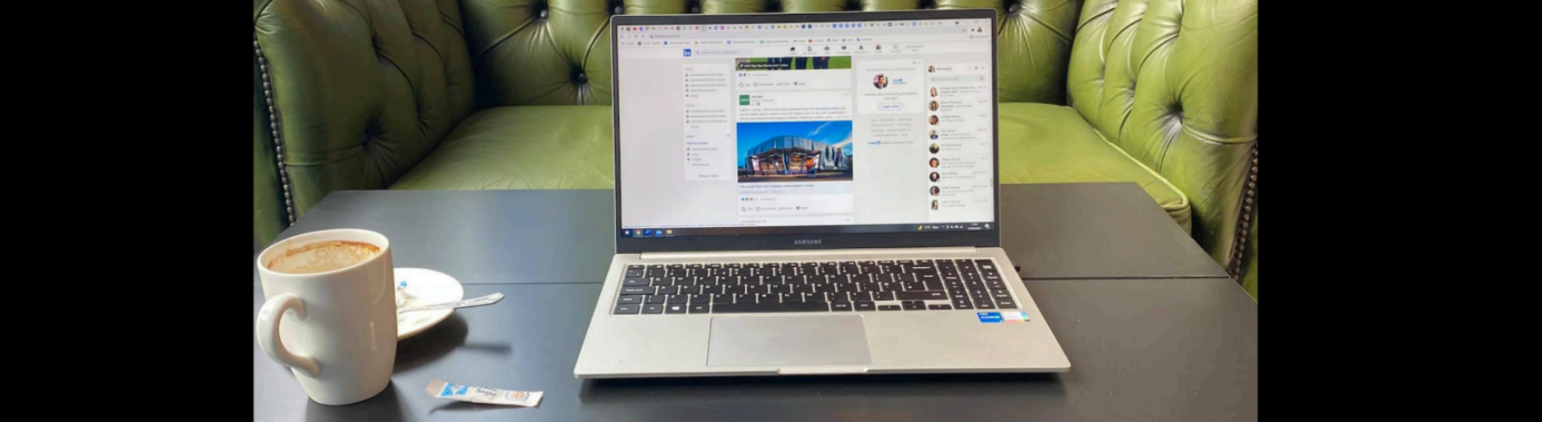

## Hemant Thapa

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=Warning)

### 2. Report Date and  Time

In [2]:
from datetime import datetime
#current date and time
current_datetime = datetime.now()
#current year, month, and time
f"Report generated on: {current_datetime.strftime('%Y-%m %H:%M:%S')}"

'Report generated on: 2023-12 11:30:46'

### 3. Stock Class for Financial Data Retrieval

In [3]:
class Stock:
    def __init__(self, ticker, period):
        self.ticker = ticker
        self.period = period

    def price_chart(self):
        return yf.download(self.ticker, period=self.period)

In [4]:
#maximum period
period = "max"

In [5]:
#declaring symbol of US 500 Companies and Ftse 100 Companies
symbols = ["^GSPC", "^FTSE"]
symbols

['^GSPC', '^FTSE']

In [6]:
#empty dictionary to store stock data
stock_data_dict = {}
#iterate through each stock symbol in the 'symbols' list
for symbol in symbols:
    #stock class with the current symbol and 'max' period
    stock_data = Stock(symbol, period="max").price_chart()
    #store the retrieved stock data in the dictionary with the symbol as the key
    stock_data_dict[symbol] = stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
#data for each symbol
for i, j in stock_data_dict.items():
    print(f"Stock Symbol: {i}")
    print(j.head(1))
    print("-"*70)
    print("\n")

Stock Symbol: ^GSPC
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
1927-12-30  17.66  17.66  17.66  17.66      17.66       0
----------------------------------------------------------------------


Stock Symbol: ^FTSE
             Open         High    Low  Close  Adj Close  Volume
Date                                                           
1984-01-03  997.5  1001.400024  997.5  997.5      997.5       0
----------------------------------------------------------------------




### 4. SNP 500 Trading Time

- #### S&P 500

The **S&P 500**, introduced in 1957, is a prominent stock market index designed to monitor the value of 500 corporations listed on the New York Stock Exchange (NYSE) and the Nasdaq. Spearheaded by **Standard & Poor's**, a reputable financial services company, the S&P 500 serves as a comprehensive measure of the market performance of these influential companies.

Beyond its role in tracking stock values, Standard & Poor's offers a wide range of financial data, investment credit ratings, and diverse equity indexes. A market index, such as the S&P 500, represents a curated collection of investments, typically stocks, grouped to provide insights into the performance of a specific segment within the broader financial market.


In [8]:
#First day of trading SNP500 in Stock Market
snp_500_ipo_launched = stock_data_dict['^GSPC'].head(1)
snp_500_ipo_launched

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0


In [9]:
#Calculating total trading days
days_difference_snp_500 = (current_datetime - snp_500_ipo_launched.index).astype('timedelta64[D]')

In [10]:
snp_500_total_working_days_in_years = current_datetime.year - snp_500_ipo_launched.index[0].year
print(f'SNP 500 total trading year: {snp_500_total_working_days_in_years} years')

SNP 500 total trading year: 96 years


In [11]:
#Total trading time 
print(f'SNP 500 index total trading days: {days_difference_snp_500[0]} days')

SNP 500 index total trading days: 35035.0 days


In [12]:
snp_500_total_trading_minutes = days_difference_snp_500 * 24 * 60
print(f'SNP 500 total trading minutes: {snp_500_total_trading_minutes[0]} minutes')

SNP 500 total trading minutes: 50450400.0 minutes


In [13]:
snp_500_total_trading_minutes = days_difference_snp_500 * 24 * 60 * 60
print(f'SNP 500 total trading Seconds: {snp_500_total_trading_minutes[0]} Seconds')

SNP 500 total trading Seconds: 3027024000.0 Seconds


### 4. FTSE 100 Trading Time


- ### FTSE 100

The **FTSE 100 Index** was launched on 3 January 1984. This market capitalization-weighted index replaced the price-weighted FT30 Index as the performance benchmark for most investors.

The FTSE 100 represents the one hundred largest companies listed on the London Stock Exchange (LSE) based on market capitalization. It serves as a key indicator of the performance of the UK stock market and is widely used by investors globally.


In [14]:
#First day of trading FTSE100 in Stock Market
ftse_100_ipo_launched = stock_data_dict['^FTSE'].head(1)
ftse_100_ipo_launched

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-01-03,997.5,1001.400024,997.5,997.5,997.5,0


In [15]:
#Calculating total trading days
days_difference_ftse_100 = (current_datetime - ftse_100_ipo_launched.index).astype('timedelta64[D]')

In [16]:
ftse_100_total_working_days_in_years = current_datetime.year - ftse_100_ipo_launched.index[0].year
print(f'FTSE 100 total trading year: {ftse_100_total_working_days_in_years} years')

FTSE 100 total trading year: 39 years


In [17]:
#Total trading time 
print(f'FTSE 100 index total trading days: {days_difference_ftse_100[0]} days')

FTSE 100 index total trading days: 14577.0 days


In [18]:
ftse_100_total_trading_minutes = days_difference_ftse_100 * 24 * 60
print(f'FTSE 100 total trading minutes: {ftse_100_total_trading_minutes[0]} minutes')

FTSE 100 total trading minutes: 20990880.0 minutes


In [19]:
ftse_100_total_trading_minutes = days_difference_ftse_100 * 24 * 60 * 60
print(f'FTSE 100 total trading Seconds: {ftse_100_total_trading_minutes[0]} Seconds')

FTSE 100 total trading Seconds: 1259452800.0 Seconds


### 5. Data Mining for Technical Analysis

- Now we know, that SNP 500 was 96 year old and FTSE 100 is 39 year old. we are going to plot Stack plot into Pound chart for comapring Performance.
- Our objective is FTSE100 and will conside only 39 year for both index price.                                                                                                                      

#### SNP 500 is in dollar and now we going to convert into pound.

In [20]:
#'USDGBP=X' with the symbol of a USD to GBP 
symbol = 'USDGBP=X'

In [21]:
period = "max"

In [22]:
usd_to_gbp = Stock(symbol, period).price_chart()

[*********************100%***********************]  1 of 1 completed


In [23]:
usd_to_gbp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5203 entries, 2003-12-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5203 non-null   float64
 1   High       5203 non-null   float64
 2   Low        5203 non-null   float64
 3   Close      5203 non-null   float64
 4   Adj Close  5203 non-null   float64
 5   Volume     5203 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 284.5 KB


In [24]:
usd_to_gbp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.58011,0.58194,0.57897,0.58187,0.58187,0
2003-12-02,0.58173,0.58231,0.57733,0.57793,0.57793,0
2003-12-03,0.57787,0.57964,0.57743,0.57867,0.57867,0
2003-12-04,0.57890,0.58197,0.57837,0.58116,0.58116,0
2003-12-05,0.58119,0.58146,0.57700,0.57700,0.57700,0


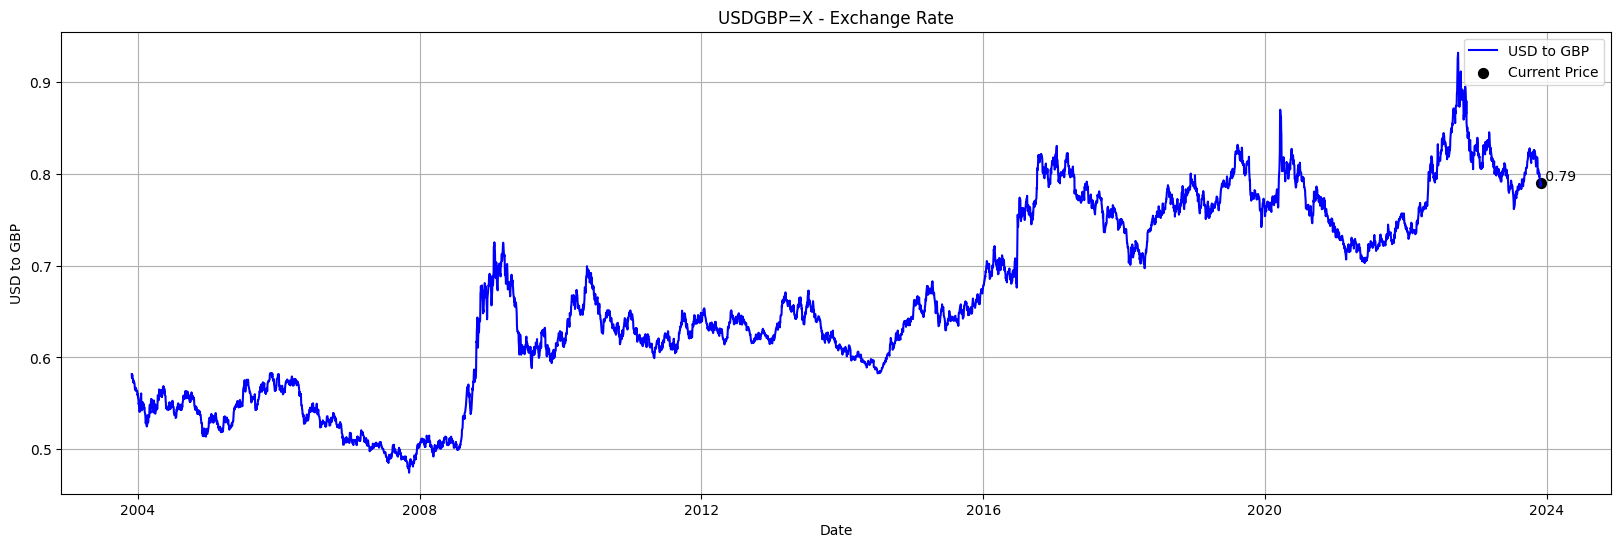

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(usd_to_gbp.index, usd_to_gbp['Close'], label='USD to GBP', color='blue')
plt.scatter(usd_to_gbp.index[-1], usd_to_gbp['Close'][-1], label='Current Price', color='black', s=50)
plt.title(f'{symbol} - Exchange Rate')
plt.xlabel('Date')
plt.ylabel('USD to GBP')
current_price_index = usd_to_gbp.index[-1]
current_price = usd_to_gbp['Close'][-1]
plt.text(current_price_index, current_price, f' {current_price:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='left', color='black')
plt.legend()
plt.grid(True)
plt.show()

#### We have Exchange rate of 5202 days between USD to GBP, now we can convert USD to GBP in SNP 500.

In [26]:
snp_500_index = Stock("^GSPC", "5202d").price_chart()

[*********************100%***********************]  1 of 1 completed


In [27]:
snp_500_index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-04-03,880.900024,885.890015,876.119995,876.450012,876.450012,1339500000
2003-04-04,876.450012,882.729980,874.229980,878.849976,878.849976,1241200000
2003-04-07,878.849976,904.890015,878.849976,879.929993,879.929993,1494000000
2003-04-08,879.929993,883.109985,874.679993,878.289978,878.289978,1235400000
2003-04-09,878.289978,887.349976,865.719971,865.989990,865.989990,1293700000


In [28]:
#Checking shape of snp500
snp_500_index.shape

(5202, 6)

In [29]:
#checking data types of snp500
snp_500_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5202 entries, 2003-04-03 to 2023-11-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5202 non-null   float64
 1   High       5202 non-null   float64
 2   Low        5202 non-null   float64
 3   Close      5202 non-null   float64
 4   Adj Close  5202 non-null   float64
 5   Volume     5202 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 284.5 KB


#### While comparing Exchange rate and SNP 500 date do not match and need better API, we are using yfinance. which is free API

In [30]:
usd_to_gbp_close = usd_to_gbp[['Close']].rename(columns={'Close': 'USD to GBP Close'})
snp_500_close = snp_500_index[['Close']].rename(columns={'Close': 'S&P 500 Close'})

In [31]:
close_data = pd.merge(usd_to_gbp_close, snp_500_close, left_index=True, right_index=True, how='inner')

In [32]:
close_data[:5]

,USD to GBP Close,S&P 500 Close
Date,,
2003-12-01,0.58187,1070.119995
2003-12-02,0.57793,1066.619995
2003-12-03,0.57867,1064.729980
2003-12-04,0.58116,1069.719971
2003-12-05,0.57700,1061.500000


## $P_{GBP} = P_{USD} × ExchangeRate$

In [33]:
snp_500_index['Close GBP'] = snp_500_index['Close'] * close_data['USD to GBP Close']

In [34]:
snp_500_index.dropna(inplace=True)

In [35]:
snp_500_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5019 entries, 2003-12-01 to 2023-11-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5019 non-null   float64
 1   High       5019 non-null   float64
 2   Low        5019 non-null   float64
 3   Close      5019 non-null   float64
 4   Adj Close  5019 non-null   float64
 5   Volume     5019 non-null   int64  
 6   Close GBP  5019 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 313.7 KB


In [36]:
snp_500_index[:5]

,Open,High,Low,Close,Adj Close,Volume,Close GBP
Date,,,,,,,
2003-12-01,1058.199951,1070.469971,1058.199951,1070.119995,1070.119995,1375000000,622.670742
2003-12-02,1070.119995,1071.219971,1065.219971,1066.619995,1066.619995,1383200000,616.431666
2003-12-03,1066.619995,1074.300049,1064.630005,1064.729980,1064.729980,1441700000,616.127324
2003-12-04,1064.729980,1070.369995,1063.150024,1069.719971,1069.719971,1463100000,621.678468
2003-12-05,1069.719971,1069.719971,1060.089966,1061.500000,1061.500000,1265900000,612.485523


In [37]:
snp_500_index.describe()

,Open,High,Low,Close,Adj Close,Volume,Close GBP
count,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5.019000e+03,5019.000000
mean,2125.428706,2137.471666,2112.591789,2125.810466,2125.810466,3.724173e+09,1494.521529
std,1076.404375,1082.209558,1070.199344,1076.532403,1076.532403,1.313514e+09,939.241098
min,679.280029,695.270020,666.789978,676.530029,676.530029,0.000000e+00,483.013338
25%,1263.819946,1271.720032,1257.199951,1263.834961,1263.834961,3.025450e+09,718.903485
50%,1789.589966,1795.979980,1779.089966,1790.290039,1790.290039,3.660230e+09,1103.803153
75%,2787.420044,2797.375000,2768.664917,2784.594971,2784.594971,4.318345e+09,2123.013837
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10,3660.803654


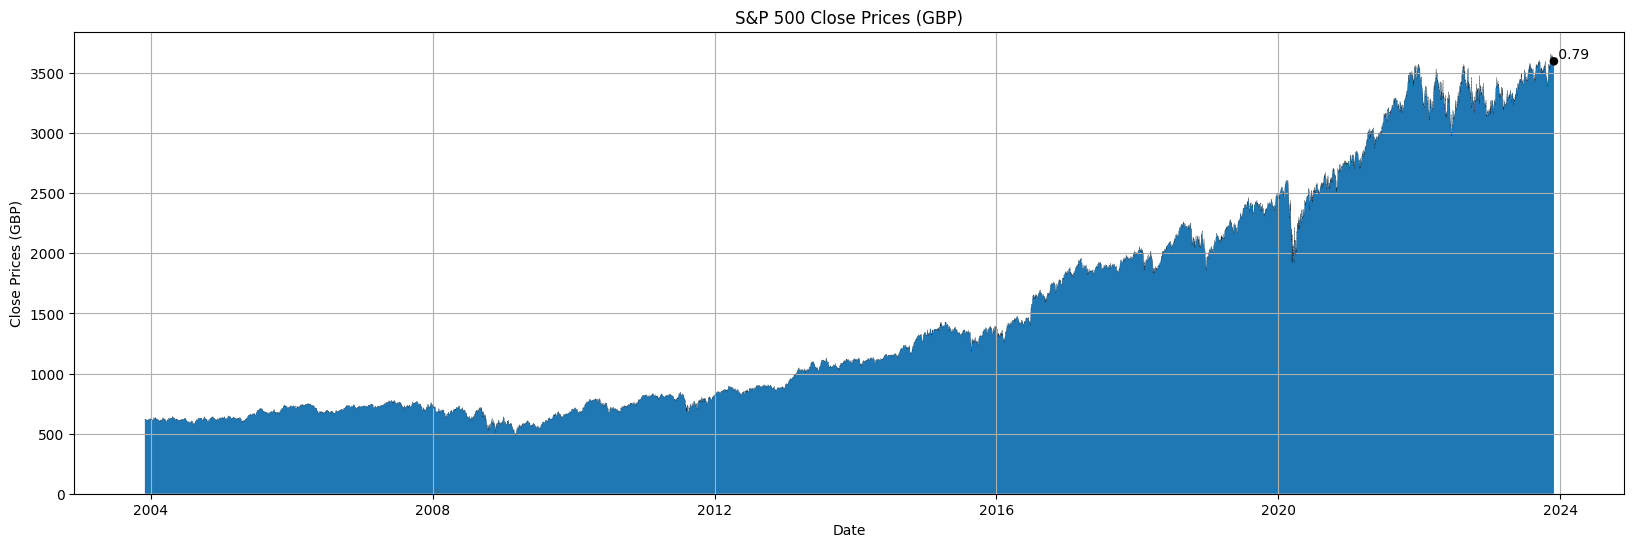

In [38]:
plt.figure(figsize=(20, 6))
plt.stackplot(snp_500_index.index, snp_500_index['Close GBP'])
plt.plot(snp_500_index.index, snp_500_index['Close GBP'], ls='--', color='black', lw=0.2)
plt.scatter(snp_500_index.index[-1], snp_500_index['Close GBP'][-1], ls='--', color='black', lw=0.2)
current_price_index_snp_500 = snp_500_index.index[-1]
current_price_snp_500 = snp_500_index['Close GBP'][-1]
plt.text(current_price_index_snp_500, current_price_snp_500, f' {current_price:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='left', color='black')
plt.title('S&P 500 Close Prices (GBP)')
plt.xlabel('Date')
plt.ylabel('Close Prices (GBP)')
plt.grid(True)
plt.show()

In [39]:
snp_500_index[:5]

,Open,High,Low,Close,Adj Close,Volume,Close GBP
Date,,,,,,,
2003-12-01,1058.199951,1070.469971,1058.199951,1070.119995,1070.119995,1375000000,622.670742
2003-12-02,1070.119995,1071.219971,1065.219971,1066.619995,1066.619995,1383200000,616.431666
2003-12-03,1066.619995,1074.300049,1064.630005,1064.729980,1064.729980,1441700000,616.127324
2003-12-04,1064.729980,1070.369995,1063.150024,1069.719971,1069.719971,1463100000,621.678468
2003-12-05,1069.719971,1069.719971,1060.089966,1061.500000,1061.500000,1265900000,612.485523


In [40]:
ftse_100_index = yf.download("^FTSE", start="2003-12-01", end=datetime.today())
ftse_100_index[:5]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,4342.600098,4410.000000,4342.600098,4410.000000,4410.000000,1574257800
2003-12-02,4410.000000,4416.500000,4359.899902,4378.899902,4378.899902,1956833600
2003-12-03,4378.899902,4401.600098,4373.000000,4392.000000,4392.000000,2145700500
2003-12-04,4392.000000,4392.000000,4371.500000,4378.200195,4378.200195,1748247800
2003-12-05,4378.200195,4385.399902,4337.700195,4367.000000,4367.000000,1518092200


In [41]:
ftse_100_index.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5.053000e+03
mean,6251.575134,6290.827443,6211.763560,6252.186166,6252.186166,1.022233e+09
std,974.012083,971.998330,976.167149,973.793744,973.793744,4.529647e+08
min,3512.100098,3564.800049,3460.699951,3512.100098,3512.100098,0.000000e+00
25%,5627.299805,5673.799805,5583.500000,5628.399902,5628.399902,6.949689e+08
50%,6318.000000,6360.100098,6274.100098,6318.200195,6318.200195,8.643590e+08
75%,7089.600098,7130.399902,7044.600098,7089.799805,7089.799805,1.293785e+09
max,8014.299805,8047.100098,7995.500000,8014.299805,8014.299805,3.761301e+09


In [42]:
ftse_100_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5053 entries, 2003-12-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5053 non-null   float64
 1   High       5053 non-null   float64
 2   Low        5053 non-null   float64
 3   Close      5053 non-null   float64
 4   Adj Close  5053 non-null   float64
 5   Volume     5053 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 276.3 KB


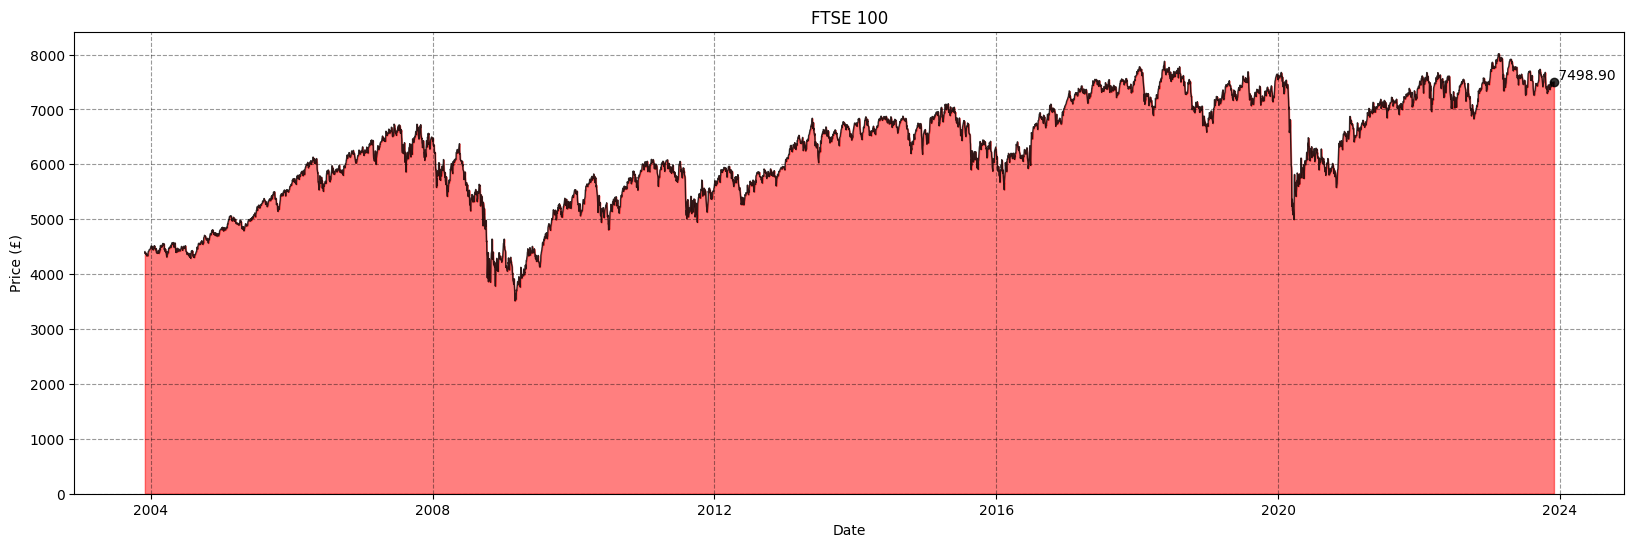

In [43]:
plt.figure(figsize=(20,6))
plt.stackplot(ftse_100_index.index, ftse_100_index['Close'].values, alpha=0.5, color='red')
plt.plot(ftse_100_index.index, ftse_100_index['Close'].values, alpha=0.8, color='black', lw=1)
plt.scatter(ftse_100_index.index[-1], ftse_100_index['Close'][-1], alpha=0.8, color='black', lw=1)
current_price_ftse_100_index = ftse_100_index.index[-1]
current_price_ftse_100 = ftse_100_index['Close'][-1]
plt.text(current_price_ftse_100_index, current_price_ftse_100, f' {current_price_ftse_100:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='left', color='black')
plt.ylabel("Price (£)")
plt.xlabel("Date")
plt.title("FTSE 100")
plt.grid(True, ls='--', color='black', alpha=0.4)
plt.show()

### 6. Comparing SNP500 & FTSE100

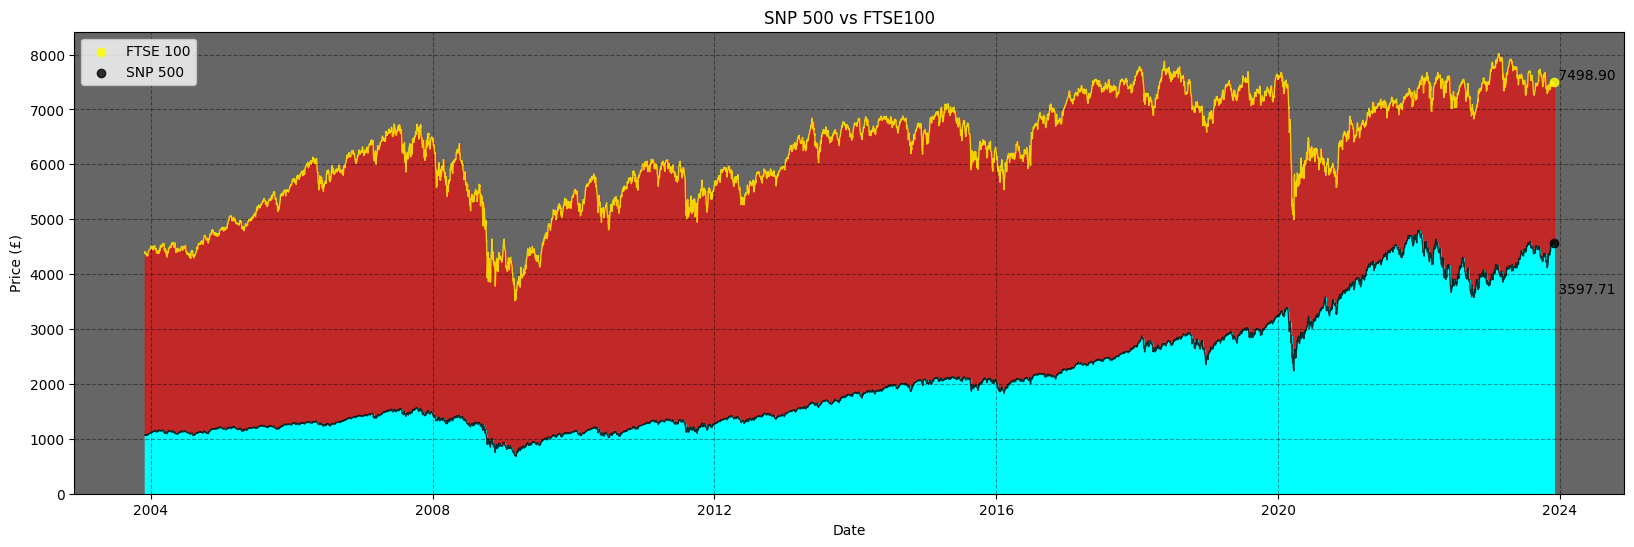

In [44]:
plt.figure(figsize=(20,6))
plt.gca().set_facecolor((0, 0, 0, 0.6)) 
plt.stackplot(ftse_100_index.index, ftse_100_index['Close'].values, alpha=0.6, color='red')
plt.scatter(ftse_100_index.index[-1], ftse_100_index['Close'].values[-1], alpha=0.8, lw=1, label='FTSE 100', color='yellow')
plt.plot(ftse_100_index.index, ftse_100_index['Close'].values, alpha=0.8, lw=1, color='yellow')
plt.stackplot(snp_500_index.index, snp_500_index['Close'].values, alpha=1, color='cyan')
plt.plot(snp_500_index.index, snp_500_index['Close'].values, alpha=0.8, color='black', lw=1)
plt.scatter(snp_500_index.index[-1], snp_500_index['Close'].values[-1], alpha=0.8, color='black', lw=1, label='SNP 500')
plt.text(current_price_ftse_100_index, current_price_ftse_100, f' {current_price_ftse_100:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='left', color='black')
plt.text(current_price_index_snp_500, current_price_snp_500, f' {current_price_snp_500:.2f}', fontsize=10, verticalalignment='bottom', horizontalalignment='left', color='black')
plt.ylabel("Price (£)")
plt.xlabel("Date")
plt.title("SNP 500 vs FTSE100")
plt.grid(True, ls='--', color='black', alpha=0.4)
plt.legend()
plt.show()

### 7. Feature Selection

In [161]:
X = snp_500_index['Close GBP'].values.reshape(-1,1)
y = ftse_100_index['Close'].values

In [162]:
if len(X) == len(y):
    print("Shape of X and y are same")
    print(X.shape)
    print(y.shape)
    pass 
elif len(X) > len(y):
    X = X[:len(y)]
    print(X.shape)
    print(y.shape)
    print("Length of X is fixed, both has same length")
elif len(y) > len(X):
    y = y[:len(X)]
    print(X.shape)
    print(y.shape)
    print("Length of y is fixed, both has same length")

(5019, 1)
(5019,)
Length of y is fixed, both has same length


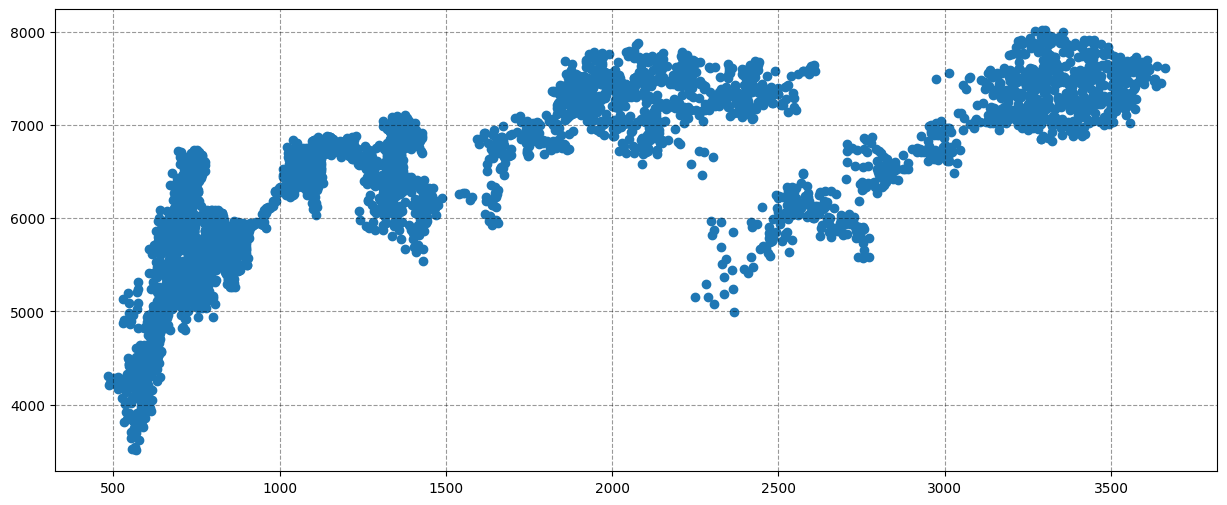

In [163]:
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.grid(True, ls='--', color='black', alpha=0.4)

### 8. Feature Scaling

In [164]:
X = (X - X.mean())/X.std()
X[:5]

array([[-0.92834274],
       [-0.93498608],
       [-0.93531014],
       [-0.92939931],
       [-0.93918792]])

In [165]:
X[:5]

array([[-0.92834274],
       [-0.93498608],
       [-0.93531014],
       [-0.92939931],
       [-0.93918792]])

In [166]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

### 9. Splitting Data into Test and Train

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [168]:
degree = 10

- **PolynomialFeatures(degree):**
Transforms the original features into polynomial features. This is particularly useful when dealing with datasets where the relationships between features and the target variable are potentially nonlinear.

- **Lasso(alpha=0.001, max_iter=10000):**
Applies Lasso regression with a regularization parameter (alpha) set to 0.001. Lasso regression includes a penalty term proportional to the absolute value of the coefficients, encouraging sparsity in the model and effectively performing feature selection.
- The `max_iter` parameter is increased to 10000 to address potential convergence issues during the optimization process.

- **Ridge(alpha=0.001)**
Applies Ridge regression with a regularization parameter (alpha) set to 0.001. Ridge regression includes an L2 regularization term that adds a penalty term proportional to the square of the coefficients. This helps prevent overfitting and can also be effective in feature selection.

### 10. Model Selection

In [169]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [170]:
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.001, max_iter=10000))
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.001))

In [171]:
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('lasso', Lasso(alpha=0.001, max_iter=10000))])

In [172]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('ridge', Ridge(alpha=0.001))])

### 11. Lasso Model Prediction 

In [173]:
#predictions on the test set using lasso, L1 Regularisation
lasso_pred = lasso_model.predict(X_test)
lasso_pred_train = lasso_model.predict(X_train)

In [174]:
#residuals for Lasso model
lasso_residuals_test = y_test - lasso_pred
lasso_residuals_train = y_train - lasso_pred_train

### Sorting Indices based on First Column

In [175]:
#sorting indices based on the first column
X_test_sorted = np.argsort(X_test[ :,0])
X_train_sorted = np.argsort(X_train[ :,0])

In [176]:
#Test set
print(X_test_sorted.shape)
#Train set
print(X_train_sorted.shape)

(1004,)
(4015,)


### 12. Residual Analysis

In [177]:
#rearranging rows based on sorted indices
X_test_sort = X_test[X_test_sorted]
X_train_sort = X_train[X_train_sorted]

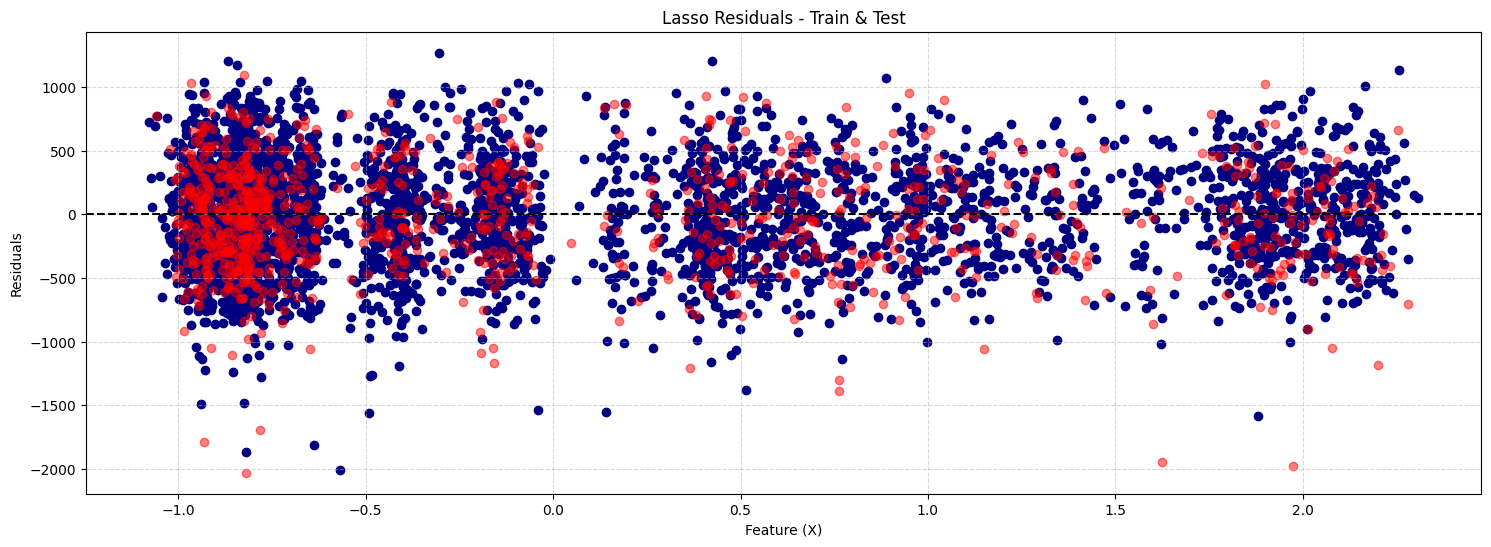

In [178]:
#residual distribution for Lasso 
plt.figure(figsize=(18, 6))
plt.scatter(X_train_sort, lasso_residuals_train, color='navy')
plt.scatter(X_test_sort, lasso_residuals_test, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Lasso Residuals - Train & Test')
plt.xlabel('Feature (X)')
plt.ylabel('Residuals')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [179]:
# Make predictions on the test set using Ridge, L2 Regularisation
ridge_pred = ridge_model.predict(X_test)
ridge_pred_train = ridge_model.predict(X_train)

In [180]:
#residuals for Ridge model
ridge_residuals_test = y_test - ridge_pred
ridge_residuals_train = y_train - ridge_pred_train

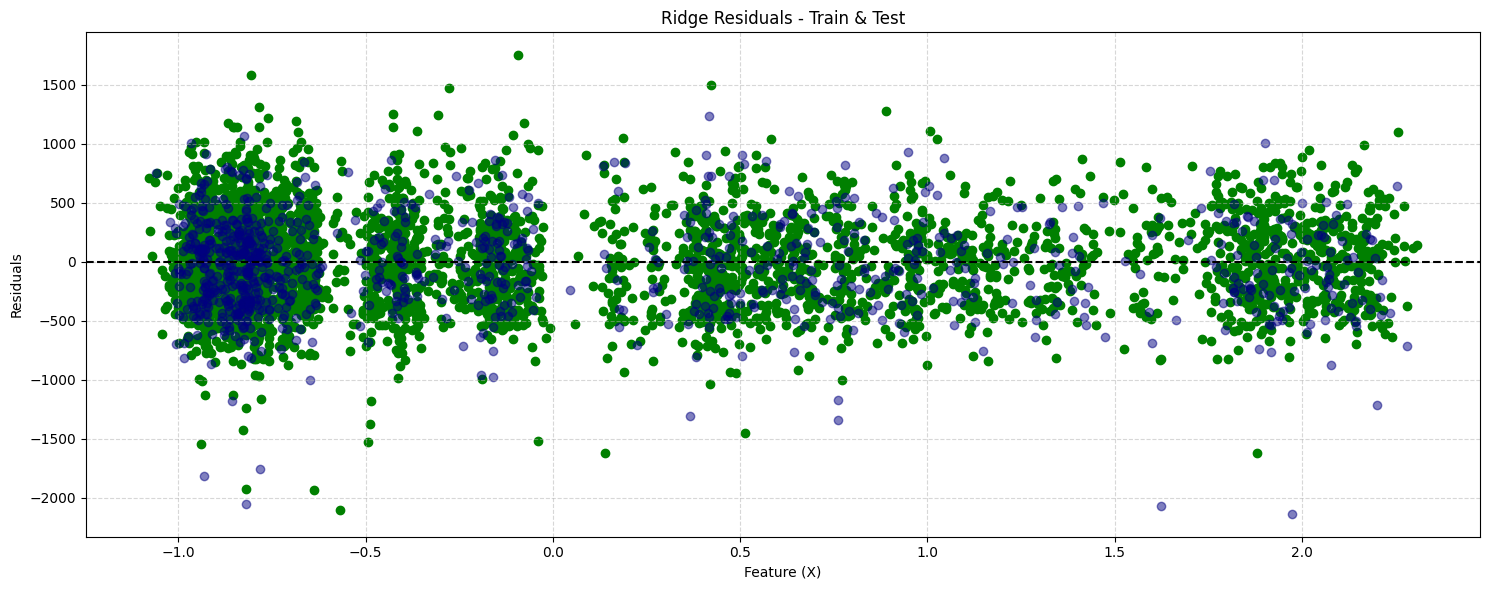

In [181]:
#residual distribution for Ridge
plt.figure(figsize=(15, 6))
plt.scatter(X_train_sort, ridge_residuals_train, color='green')
plt.scatter(X_test_sort, ridge_residuals_test, color='navy', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True, ls='--', alpha=0.5)
plt.title('Ridge Residuals - Train & Test')
plt.xlabel('Feature (X)')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [182]:
X_test_sort[:10]

array([[-1.05967089],
       [-1.02107007],
       [-1.00969118],
       [-1.00740438],
       [-1.00670096],
       [-1.00475359],
       [-1.00277557],
       [-0.99961617],
       [-0.99911713],
       [-0.99809811]])

In [183]:
X_train_sort[:10]

array([[-1.07704931],
       [-1.07418997],
       [-1.0691303 ],
       [-1.06281036],
       [-1.0559714 ],
       [-1.04773307],
       [-1.04440543],
       [-1.04293093],
       [-1.03645295],
       [-1.03579933]])

### 13. Sorting Indices

In [184]:
y_pred_sort_lasso = lasso_pred[X_test_sorted]
y_pred_sort_lasso[:5]

array([3526.13614815, 4027.94648349, 4161.00914862, 4186.98125228,
       4194.91931794])

In [185]:
y_pred_sort_ridge = ridge_pred[X_test_sorted]
y_pred_sort_ridge[:5]

array([2992.96414362, 3776.88559168, 3967.70842432, 4004.13241929,
       4015.21166588])

In [186]:
y_pred_train_sort_lasso = lasso_pred_train[X_train_sorted]
y_pred_train_sort_ridge = ridge_pred_train[X_train_sorted]

In [187]:
y_pred_train_sort_lasso[:5]

array([3272.81117995, 3315.73068718, 3390.46965484, 3481.6896914 ,
       3577.782143  ])

In [188]:
y_pred_train_sort_ridge[:5]

array([2558.22330243, 2633.72722956, 2763.40787692, 2918.58714255,
       3078.3746807 ])

### 14. Predicting Best Fit Line

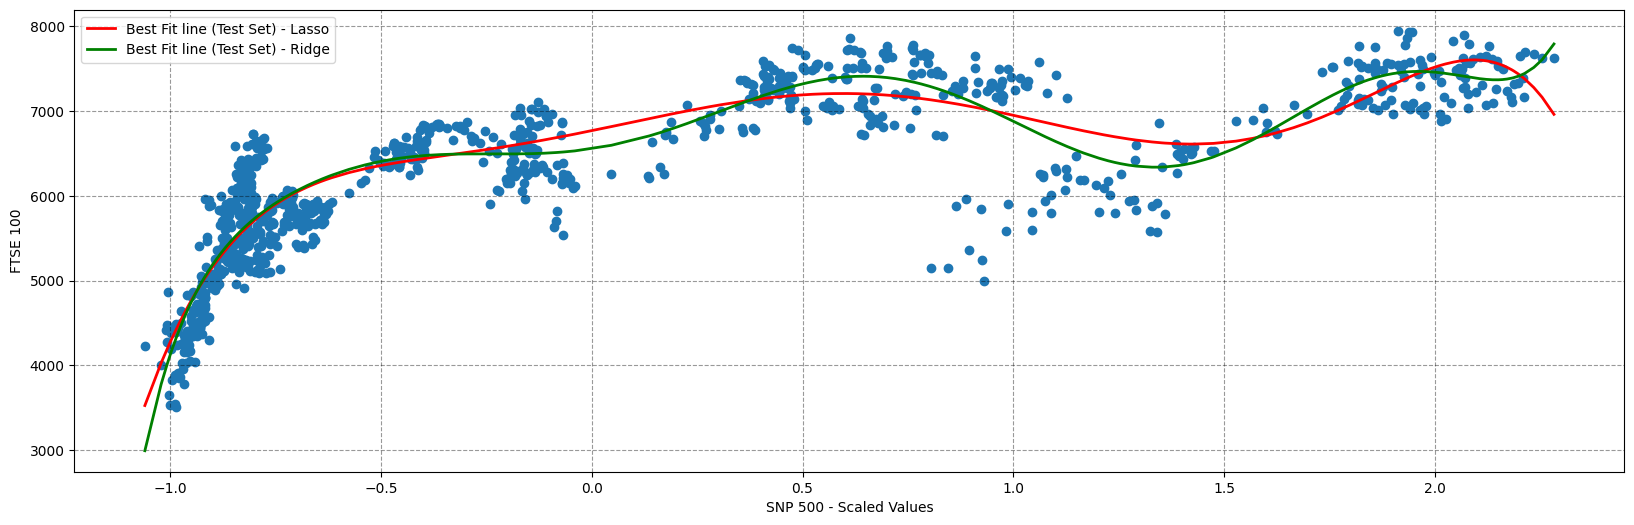

In [189]:
plt.figure(figsize=(20,6))
plt.scatter(X_test, y_test)
plt.plot(X_test_sort, y_pred_sort_lasso, color='red', lw=2, label="Best Fit line (Test Set) - Lasso")
plt.plot(X_test_sort, y_pred_sort_ridge, color='green', lw=2, label="Best Fit line (Test Set) - Ridge")
plt.grid(True, ls='--', color='black', alpha=0.4)
plt.ylabel('FTSE 100')
plt.xlabel('SNP 500 - Scaled Values')
plt.legend()
plt.show()

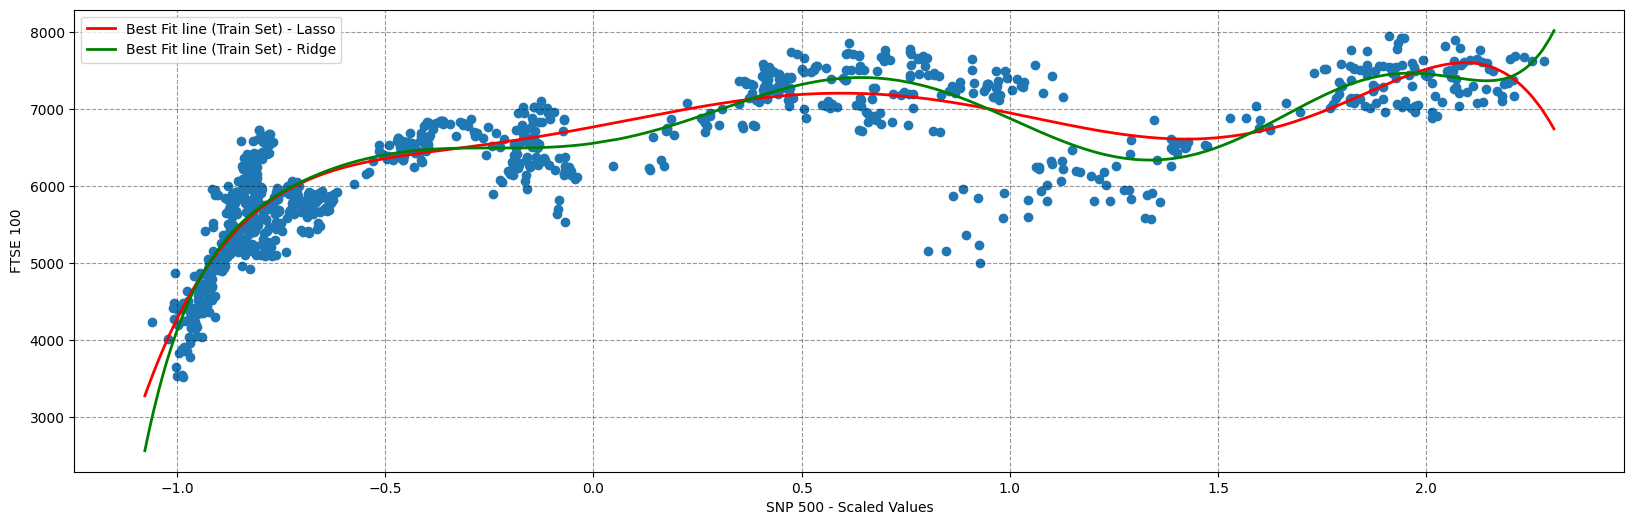

In [190]:
plt.figure(figsize=(20,6))
plt.scatter(X_test, y_test)
plt.plot(X_train_sort, y_pred_train_sort_lasso, color='red', lw=2, label="Best Fit line (Train Set) - Lasso")
plt.plot(X_train_sort, y_pred_train_sort_ridge, color='green', lw=2, label="Best Fit line (Train Set) - Ridge")
plt.grid(True, ls='--', color='black', alpha=0.4)
plt.ylabel('FTSE 100')
plt.xlabel('SNP 500 - Scaled Values')
plt.legend()
plt.show()

### 15. Model Evaluation

In [191]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Mean Square Error

In [192]:
lasso_mse_test = mean_squared_error(y_test, lasso_pred)
lasso_mse_train = mean_squared_error(y_train, lasso_pred_train)
print(f"Lasso Test Mean Squared Error with Polynomial Features: {lasso_mse_test}")
print(f"Lasso Train Mean Squared Error with Polynomial Features: {lasso_mse_train}")

Lasso Test Mean Squared Error with Polynomial Features: 178097.3220964736
Lasso Train Mean Squared Error with Polynomial Features: 169297.14009078586


In [193]:
ridge_mse_test = mean_squared_error(y_test, ridge_pred)
ridge_mse_train = mean_squared_error(y_train, ridge_pred_train)
print(f"Ridge Test Mean Squared Error with Polynomial Features: {ridge_mse_test}")
print(f"Ridge Train Mean Squared Error with Polynomial Features: {ridge_mse_train}")

Ridge Test Mean Squared Error with Polynomial Features: 160704.39277885063
Ridge Train Mean Squared Error with Polynomial Features: 155355.14936277733


### R Square

In [194]:
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_r2_train = r2_score(y_train, lasso_pred_train)
print(f"Lasso Regression Test R-squared: {lasso_r2:.4f}")
print(f"Lasso Regression Train R-squared: {lasso_r2_train:.4f}")

Lasso Regression Test R-squared: 0.8160
Lasso Regression Train R-squared: 0.8196


In [195]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_r2_train = r2_score(y_train, ridge_pred_train)
print(f"Ridge Regression Test R-squared: {ridge_r2:.4f}")
print(f"Ridge Regression Train R-squared: {ridge_r2_train:.4f}")

Ridge Regression Test R-squared: 0.8340
Ridge Regression Train R-squared: 0.8345


### 16. Cross Validation

In [196]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [197]:
r_squared_lasso_score = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')
r_squared_ridge_score = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')

In [198]:
for i, j in enumerate(r_squared_lasso_score, 1):
    print(f"Fold {i}: R Square {j:.6f}")

Fold 1: R Square 0.832430
Fold 2: R Square 0.813690
Fold 3: R Square 0.798429
Fold 4: R Square 0.817032
Fold 5: R Square 0.833215


In [199]:
for i, j in enumerate(r_squared_ridge_score, 1):
    print(f"Fold {i}: R Square {j:.6f}")

Fold 1: R Square 0.849540
Fold 2: R Square 0.821800
Fold 3: R Square 0.815901
Fold 4: R Square 0.831347
Fold 5: R Square 0.847660


In [200]:
mean_r_square_lasso = np.mean(r_squared_lasso_score)
print(f"Mean R Squared Lasso: {mean_r_square_lasso}")

Mean R Squared Lasso: 0.818959008719929


In [201]:
mean_r_square_ridge = np.mean(r_squared_ridge_score)
print(f"Mean R Squared Ridge: {mean_r_square_ridge}")

Mean R Squared Ridge: 0.8332496411874984


### 17. Residual Analysis

## Lasso Model

In [202]:
residual_lasso_test = y_test - y_pred_sort_lasso
residual_lasso_test[:5]

array([3021.76375419, 3631.15361417, 2616.69104669,  813.01874772,
       2516.9805844 ])

In [203]:
residual_lasso_train = y_train - y_pred_train_sort_lasso
residual_lasso_train[:5]

array([3292.68882005, 3422.76931282, 2609.63044282, 3038.8103086 ,
       2920.01766169])

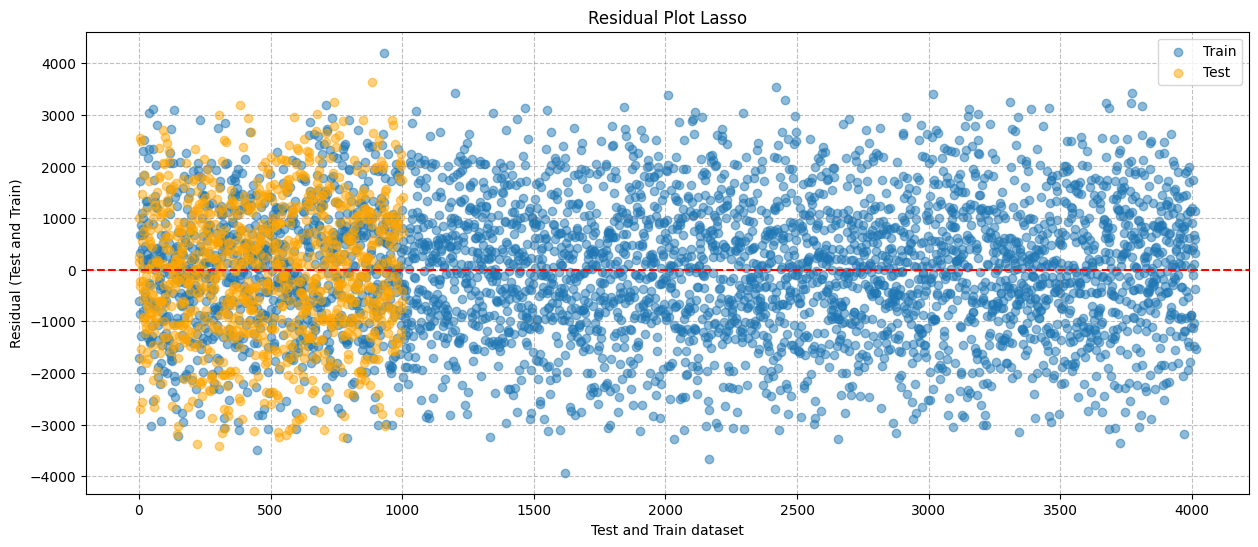

In [204]:
plt.figure(figsize=(15,6))
plt.scatter(X_train_sorted, residual_lasso_train, alpha=0.5, label='Train')
plt.scatter(X_test_sorted, residual_lasso_test, alpha=0.5, color='orange', label='Test')
plt.axhline(0, ls='--',color='red')
plt.ylabel('Residual (Test and Train)')
plt.xlabel('Test and Train dataset')
plt.title('Residual Plot Lasso')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

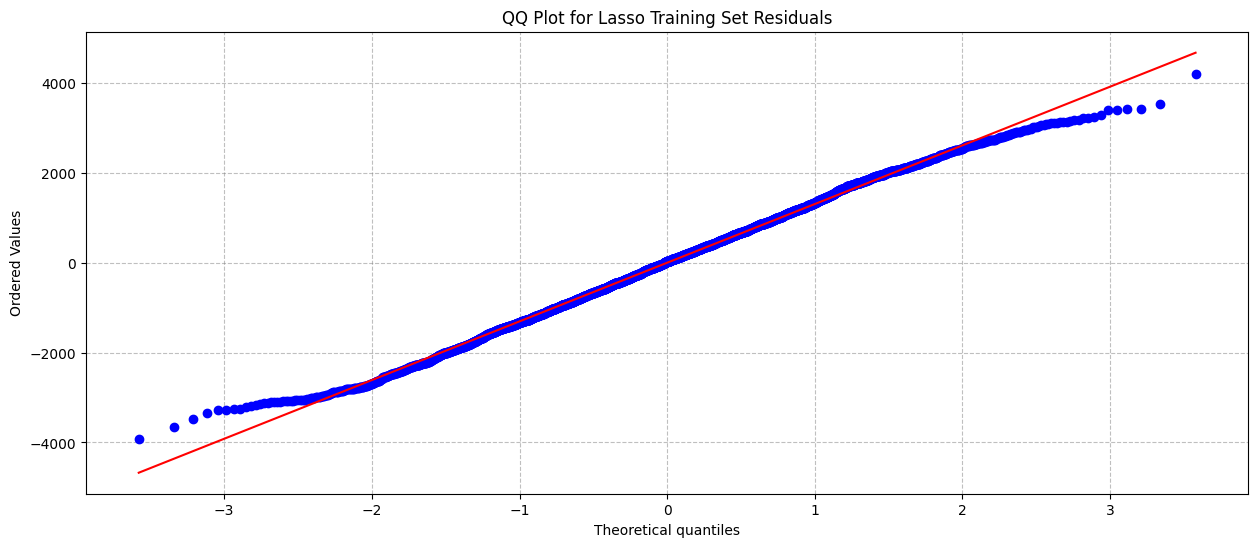

In [205]:
#QQ plot for training set residuals
plt.figure(figsize=(15, 6))
stats.probplot(residual_lasso_train, dist="norm", plot=plt)
plt.title('QQ Plot for Lasso Training Set Residuals')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

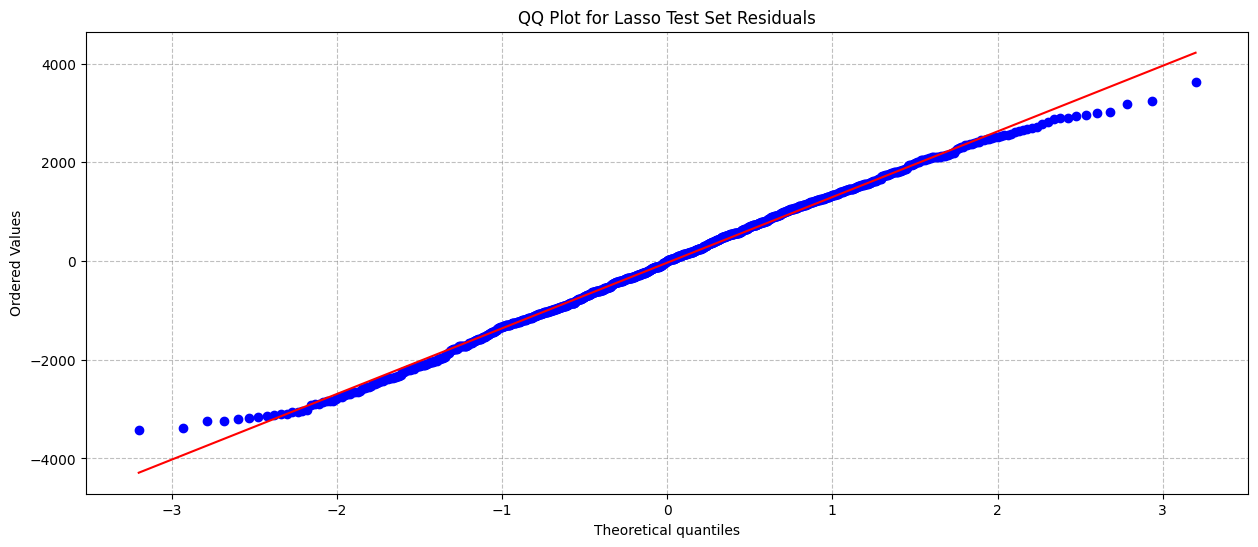

In [206]:
#QQ plot for test set residuals
plt.figure(figsize=(15,6))
stats.probplot(residual_lasso_test, dist="norm", plot=plt)
plt.title('QQ Plot for Lasso Test Set Residuals')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

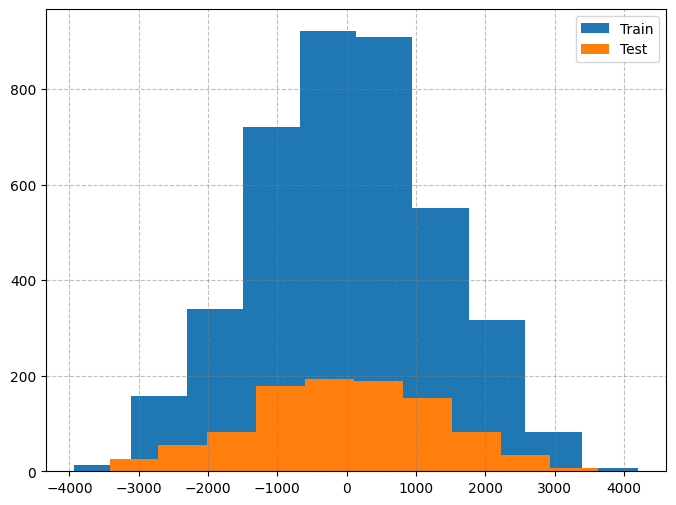

In [207]:
plt.figure(figsize=(8,6))
plt.hist(residual_lasso_train, label="Train")
plt.hist(residual_lasso_test, label="Test")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

## Ridge Model

In [208]:
residual_ridge_test = y_test - y_pred_sort_ridge
residual_ridge_test[:5]

array([3554.93575873, 3882.21450598, 2809.99177099,  995.86758071,
       2696.68823646])

In [209]:
residual_ridge_train = y_train - y_pred_train_sort_ridge
residual_ridge_train[:5]

array([4007.27669757, 4104.77277044, 3236.69222074, 3601.91285745,
       3419.42512398])

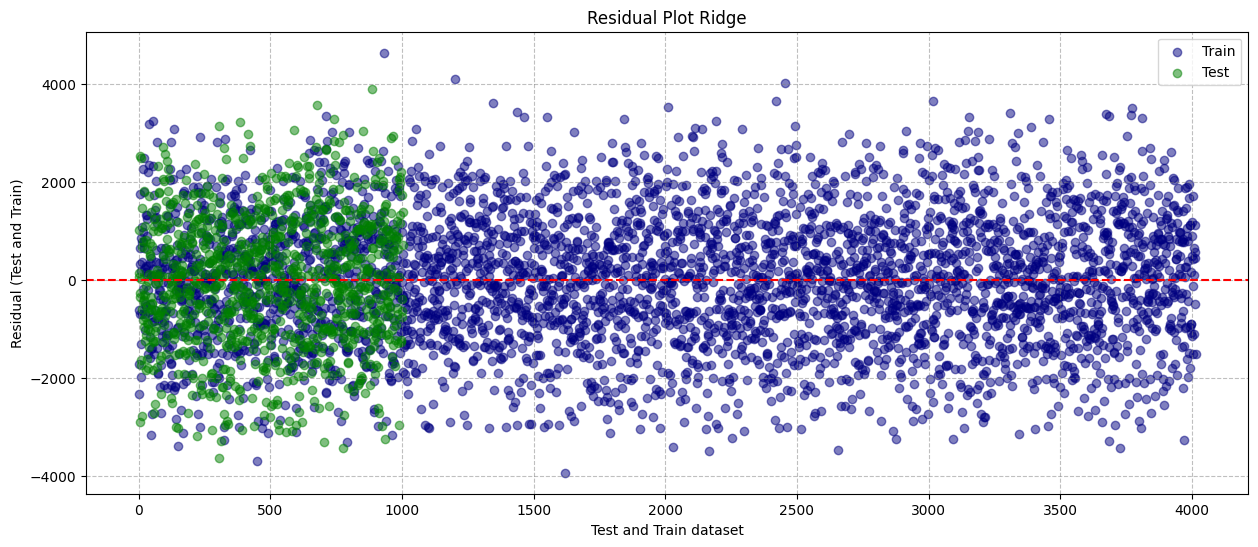

In [210]:
plt.figure(figsize=(15,6))
plt.scatter(X_train_sorted, residual_ridge_train, alpha=0.5,color='navy', label='Train')
plt.scatter(X_test_sorted, residual_ridge_test, alpha=0.5, color='green', label='Test')
plt.axhline(0, ls='--',color='red')
plt.ylabel('Residual (Test and Train)')
plt.xlabel('Test and Train dataset')
plt.title('Residual Plot Ridge')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

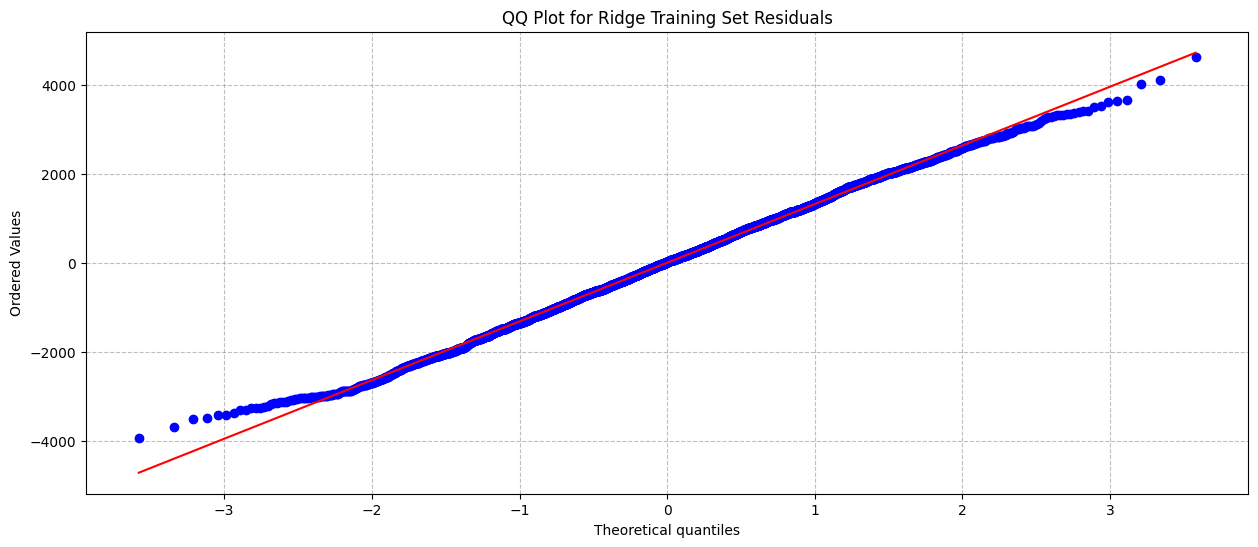

In [211]:
#QQ plot for training set residuals
plt.figure(figsize=(15, 6))
stats.probplot(residual_ridge_train, dist="norm", plot=plt)
plt.title('QQ Plot for Ridge Training Set Residuals')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

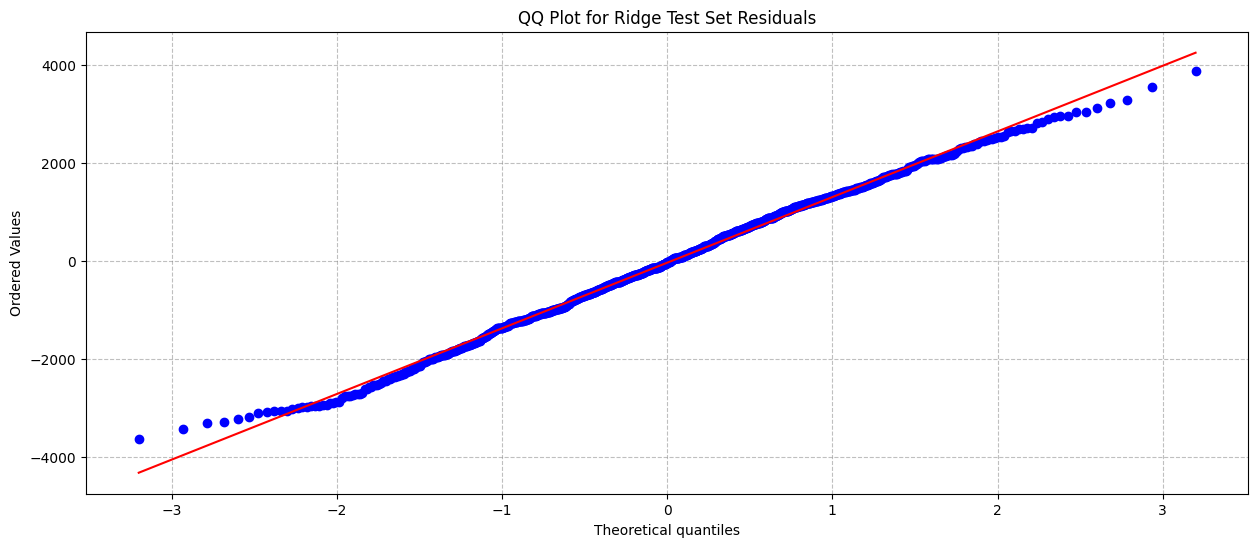

In [212]:
#QQ plot for test set residuals
plt.figure(figsize=(15,6))
stats.probplot(residual_ridge_test, dist="norm", plot=plt)
plt.title('QQ Plot for Ridge Test Set Residuals')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.show()

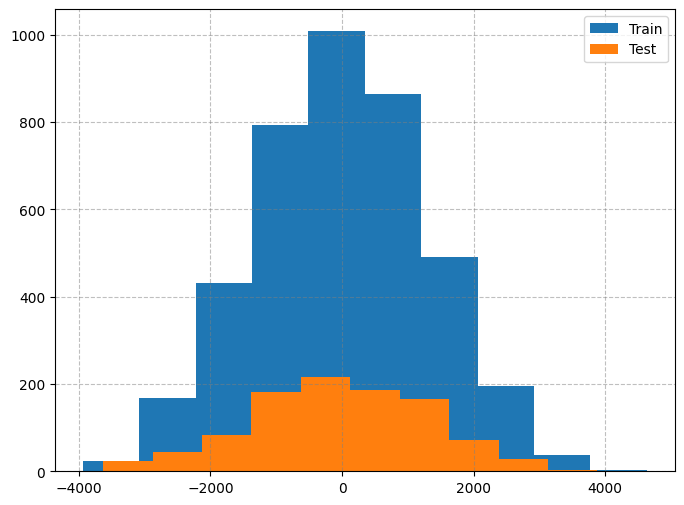

In [213]:
plt.figure(figsize=(8,6))
plt.hist(residual_ridge_train, label="Train")
plt.hist(residual_ridge_test, label="Test")
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

## References

1. [scikit-learn - Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)

2. [Lab 10 - Introduction to Python and scikit-learn](https://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html)
